## Problem Statement
Build a CNN based model which can accurately detect melanoma. <b>Melanoma</b> is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution that can evaluate images and alert dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing necessary Libraries 

In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pathlib
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D

<b>Loading Dataset using Google Drive in Google Colab

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!unzip "/content/gdrive/My Drive/CNN_assignment"

Archive:  /content/gdrive/My Drive/CNN_assignment.zip
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010889.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024468.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024470.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024511.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024646.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024654.jpg  
  inflating: Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024707.jpg  
  inflatin

In [4]:
data_dir_train = pathlib.Path("/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/")
data_dir_test = pathlib.Path("/content/Skin cancer ISIC The International Skin Imaging Collaboration/Test/")

In [5]:
# Analysing dataset
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)

#Test Image count
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


In [6]:
#declaring variables
batch_size = 32
img_height = 180
img_width = 180

### Reading and Visualizing dataset 

In [7]:
#Using keras to read dataset
mel_dataset=tf.keras.utils.image_dataset_from_directory(data_dir_train,labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    batch_size=32,
    image_size=(img_height,img_width),
    seed=123)

Found 2239 files belonging to 9 classes.


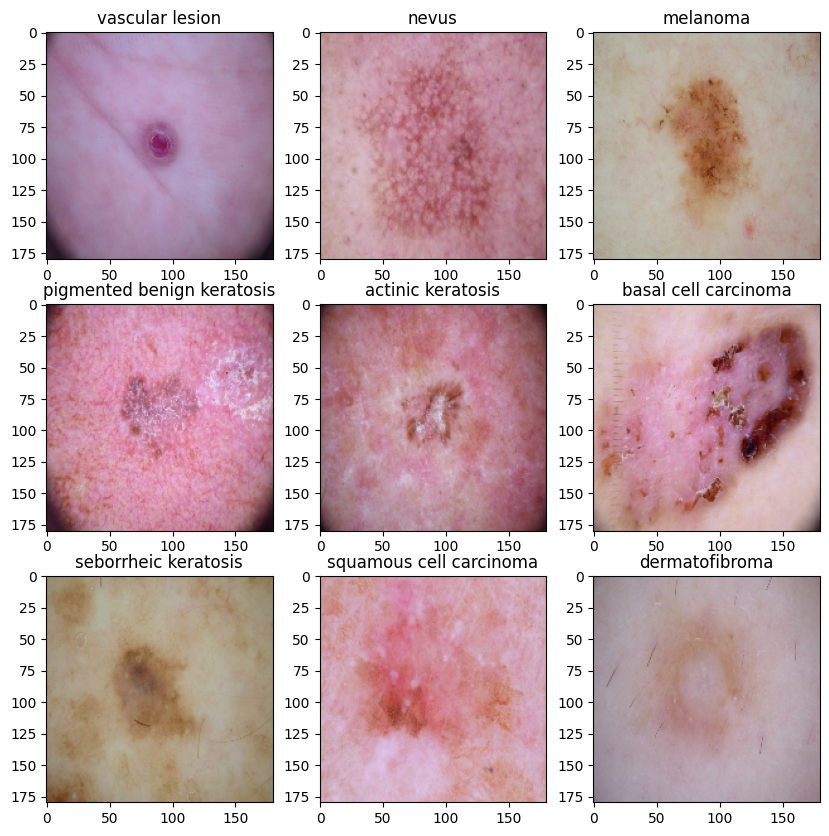

In [8]:
# Visualising dataset, one sample from each class
label=mel_dataset.class_names
import matplotlib.pyplot as plt
#q=mel_dataset.class_names
index=1
label_dict = {key: 0 for key in label}
plt.figure(figsize=(10,10))
for images,labels in mel_dataset:
    label1=labels[0]
    class_index=tf.argmax(label1)
    if(label_dict[label[class_index]]==0):
        image=images[0]
        plt.subplot(3,3,index)
        plt.imshow(image.numpy().astype("uint8"))
        plt.title(label[class_index])
        index=index+1
        label_dict[label[class_index]]+=1
plt.show()

In [9]:
#Splitting data in training and validation set (ratio 80:20)
train_ds = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, batch_size=32,
                                                               image_size=(180,180), label_mode='categorical',
                                                               seed=123,subset="training",
                                                               validation_split=0.2)
val_ds =tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,batch_size=32,
                                                            image_size=(180,180), label_mode='categorical',
                                                            seed=123,subset="validation",
                                                            validation_split=0.2)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.
Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [10]:
# Building Model
Model= Sequential()
Model.add(layers.experimental.preprocessing.Rescaling(scale=1./255,input_shape=(180,180,3)))
Model.add(Conv2D(32,(3,3),activation='relu')) #--> remove padding
Model.add(MaxPooling2D(pool_size=(2, 2)))
Model.add(Conv2D(64,(3,3),activation='relu'))
Model.add(MaxPooling2D(pool_size=(2, 2)))
Model.add(Conv2D(64,(3,3),activation='relu'))
Model.add(MaxPooling2D(pool_size=(2, 2)))
Model.add(Conv2D(128,(3,3),activation='relu'))
Model.add(MaxPooling2D(pool_size=(2, 2)))
Model.add(layers.Flatten())
Model.add(layers.Dense(155,activation='relu'))
Model.add(layers.Dense(len(mel_dataset.class_names),activation='softmax'))
Model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 89, 89, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 64)        3

In [11]:
# Compiling Model
Model.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [12]:
# Model training
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
epochs = 20
history = Model.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/20
56/56 [==============================] - 28s 86ms/step - loss: 2.0184 - accuracy: 0.2344 - val_loss: 1.9055 - val_accuracy: 0.2662
Epoch 2/20
56/56 [==============================] - 2s 32ms/step - loss: 1.7276 - accuracy: 0.3650 - val_loss: 1.6894 - val_accuracy: 0.3736
Epoch 3/20
56/56 [==============================] - 2s 32ms/step - loss: 1.6356 - accuracy: 0.4035 - val_loss: 1.5832 - val_accuracy: 0.4653
Epoch 4/20
56/56 [==============================] - 2s 32ms/step - loss: 1.4833 - accuracy: 0.4805 - val_loss: 1.4642 - val_accuracy: 0.4855
Epoch 5/20
56/56 [==============================] - 2s 32ms/step - loss: 1.4218 - accuracy: 0.5134 - val_loss: 1.4743 - val_accuracy: 0.4877
Epoch 6/20
56/56 [==============================] - 2s 34ms/step - loss: 1.3647 - accuracy: 0.5251 - val_loss: 1.4472 - val_accuracy: 0.5056
Epoch 7/20
56/56 [==============================] - 2s 33ms/step - loss: 1.3170 - accuracy: 0.5368 - val_loss: 1.3991 - val_accuracy: 0.5011
Epoch 8/20
5

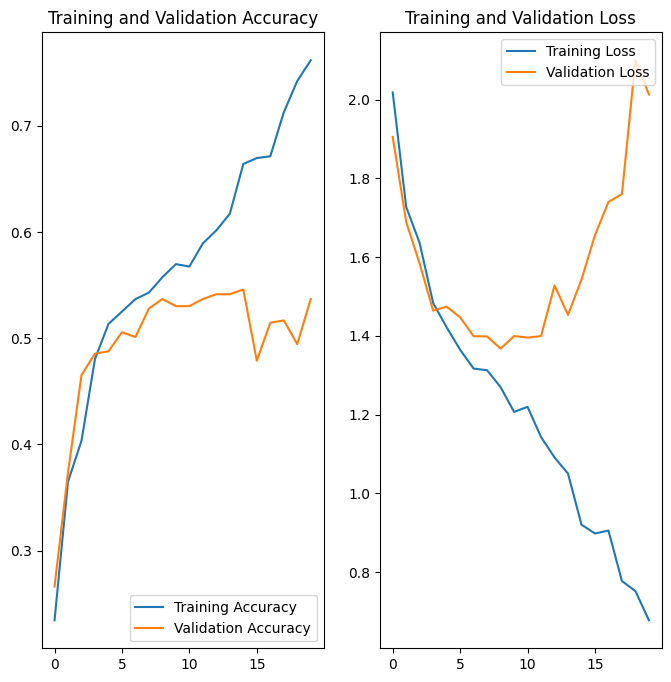

In [13]:
# Model Evaluation using accuracy and loss metric
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Observations
- Model is overfitting
- Validation loss is increasing while decrease in training loss, indicating overfitting in model.
- This could be rectified by image augmentation or changing model architecture 

<B> Using Image augmentation to resolve the issues faced in pervious model

In [14]:
# Choosing an appropriate data augumentation strategy.
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("vertical",
                                                 input_shape=(img_height,
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomFlip("horizontal",
                                                 input_shape=(img_height,
                                                              img_width,
                                                              3)),
   layers.experimental.preprocessing.RandomRotation(0.5),
  ]
)

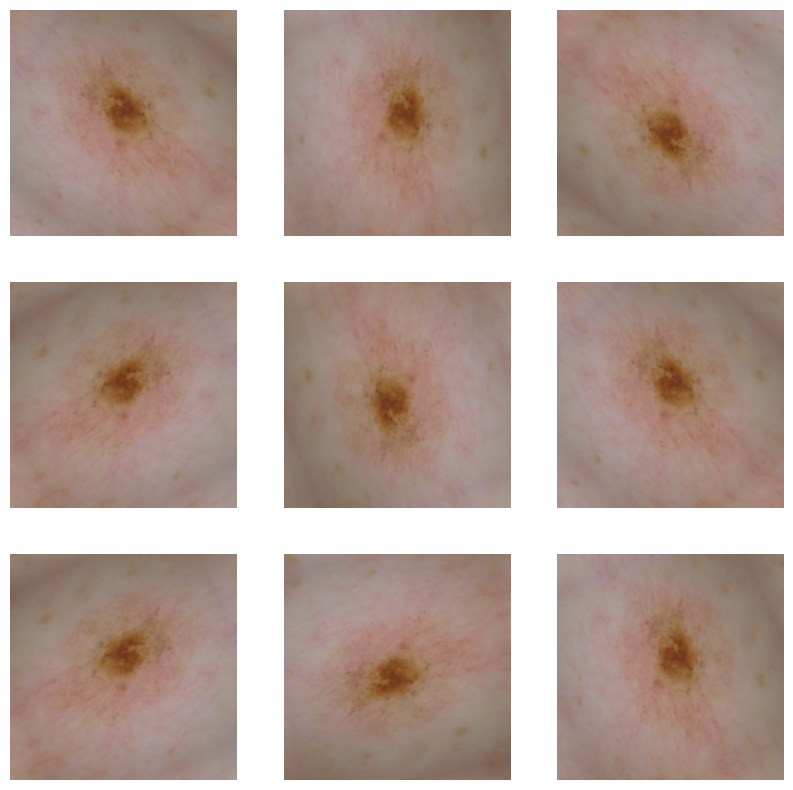

In [15]:
# visualizing augmentation strategy for one instance of training image.
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [16]:
# Model based on Image Augmentation
Model1 = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.5),
  layers.Conv2D(128, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(155, 3, padding='same', activation='relu'),
  layers.Flatten(),
  layers.Dense(155, activation='relu'),
  layers.Dropout(0.4),
  layers.Dense(len(mel_dataset.class_names))
])
Model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 180, 180, 3)       0         
                                                                 
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 180, 180, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 90, 90, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 90, 90, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 45, 45, 64)        0         
 g2D)                                                 

In [17]:
# Compiling the model
Model1.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [18]:
# Training the model
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
epochs = 20
history1 = Model1.fit(train_ds, validation_data=val_ds, epochs=epochs)

Epoch 1/20
56/56 [==============================] - 10s 74ms/step - loss: 7.4949 - accuracy: 0.1406 - val_loss: 9.2971 - val_accuracy: 0.1499
Epoch 2/20
56/56 [==============================] - 3s 60ms/step - loss: 8.0151 - accuracy: 0.1546 - val_loss: 6.8763 - val_accuracy: 0.1499
Epoch 3/20
56/56 [==============================] - 3s 59ms/step - loss: 8.4496 - accuracy: 0.1373 - val_loss: 9.5462 - val_accuracy: 0.1499
Epoch 4/20
56/56 [==============================] - 3s 62ms/step - loss: 7.5283 - accuracy: 0.1122 - val_loss: 9.9521 - val_accuracy: 0.1499
Epoch 5/20
56/56 [==============================] - 3s 61ms/step - loss: 7.8507 - accuracy: 0.1395 - val_loss: 10.1324 - val_accuracy: 0.1499
Epoch 6/20
56/56 [==============================] - 3s 58ms/step - loss: 7.7543 - accuracy: 0.1417 - val_loss: 10.1324 - val_accuracy: 0.1499
Epoch 7/20
56/56 [==============================] - 3s 59ms/step - loss: 8.1552 - accuracy: 0.1384 - val_loss: 9.3031 - val_accuracy: 0.1499
Epoch 8/20

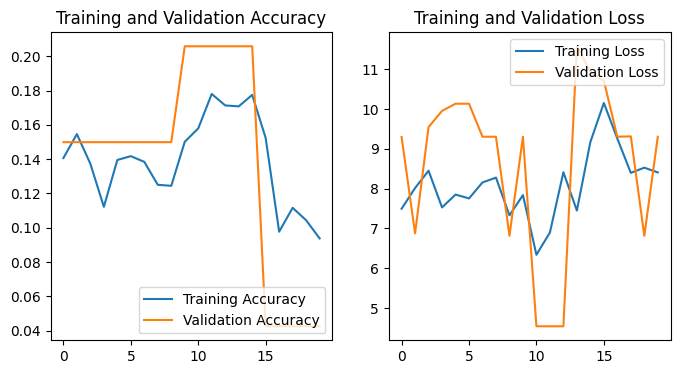

In [19]:
# Model Evaluation based on Accuracy and Loss Metric
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']

loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Observations
- It's evident that model is not performing well on given dataset.
- Also it can be said that there is overfitting in model as Validation accuracy is lower than Training Accuracy and Validation Loss is higher than Training Loss.
- It could be because of Class Imbalance in Data set
- There's is some improvement from pervious model as the loss in training and validation is reduced from  1.33538 to 0.8963. Also, accuracy metric difference reduced from 22.48% to 5.13%

## Checking Class Imbalance in dataset

In [20]:
# A function to read training dataset and get image count per subclass
import os

def class_distribution_count(directory):

    #count number of image in each classes
    count= []
    for path in pathlib.Path(directory).iterdir():
        if path.is_dir():
            count.append(len([name for name in os.listdir(path)
                               if os.path.isfile(os.path.join(path, name))]))

    #name of the classes
    sub_directory = [name for name in os.listdir(directory)
                    if os.path.isdir(os.path.join(directory, name))]

    #return dataframe with image count and class.
    return pd.DataFrame(list(zip(sub_directory,count)),columns =['Class', 'No. of Image'])

df = class_distribution_count(data_dir_train)
df

,Class,No. of Image
0,actinic keratosis,114
1,vascular lesion,139
2,squamous cell carcinoma,181
3,seborrheic keratosis,77
4,dermatofibroma,95
5,pigmented benign keratosis,462
6,basal cell carcinoma,376
7,nevus,357
8,melanoma,438


<Axes: xlabel='No. of Image', ylabel='Class'>

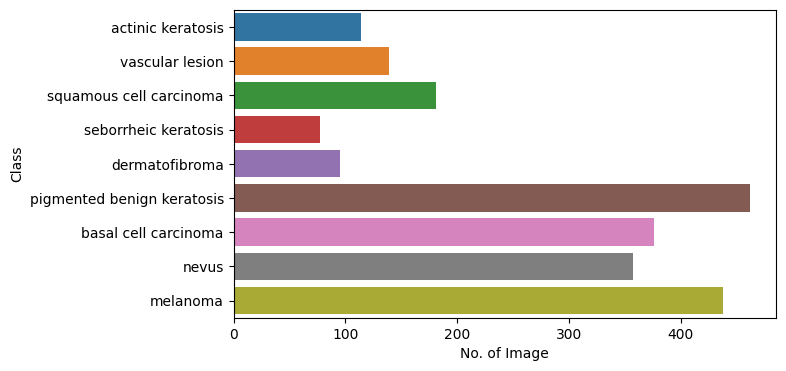

In [21]:
# Visualising image count based on subclasses via barplot
import seaborn as sns
plt.figure(figsize=(7, 4))
sns.barplot(x="No. of Image", y="Class", data=df,
            label="Class")

## Observations:
- Class "seborrheic keratosis" has least number of samples.
- "Pigmented benign keratosis" and "melanoma" dominates the data as they have 20.6% and 19.56% of data of the dataset respectively.
- Using Augmentor Library to deal with the class imbalance.

## Installing Augmentor Library

In [22]:
# Installing augmentor library to handle class imbalance
!pip install augmentor

In [23]:
# Creating Pipeline
import Augmentor
path_to_images="/content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
print(mel_dataset.class_names)
for i in mel_dataset.class_names:
    p = Augmentor.Pipeline(path_to_images + i,path_to_images + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']
Initialised with 114 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7D27D0C366E0>: 100%|██████████| 500/500 [00:18<00:00, 27.35 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7D27D0C53BB0>: 100%|██████████| 500/500 [00:21<00:00, 23.12 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7D28F25D39D0>: 100%|██████████| 500/500 [00:21<00:00, 23.47 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7D27D0A9DBA0>: 100%|██████████| 500/500 [01:22<00:00,  6.03 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=767x576 at 0x7D27D0AE7190>: 100%|██████████| 500/500 [01:12<00:00,  6.89 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7D2869B2DAB0>: 100%|██████████| 500/500 [00:16<00:00, 29.96 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7D27D0C49AE0>: 100%|██████████| 500/500 [00:34<00:00, 14.37 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7D29038C4100>: 100%|██████████| 500/500 [00:16<00:00, 30.80 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7D2815BB82E0>: 100%|██████████| 500/500 [00:15<00:00, 32.51 Samples/s]


In [24]:
# Checking size of new dataset
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
print(len(mel_dataset.class_names))

6739
9


In [25]:
# Splitting new dataset in training and validation set (Ratio 80:20)
train_ds1 = tf.keras.preprocessing.image_dataset_from_directory(data_dir_train, batch_size=32,
                                                               image_size=(180,180), label_mode='categorical',
                                                               seed=123,subset="training",
                                                               validation_split=0.2)


val_ds1 =tf.keras.preprocessing.image_dataset_from_directory(data_dir_train,batch_size=32,
                                                            image_size=(180,180), label_mode='categorical',
                                                            seed=123,subset="validation",
                                                            validation_split=0.2)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.
Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


### Model Creation

In [26]:
# Creating model
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping

Model3= Sequential()
Model3.add(layers.experimental.preprocessing.Rescaling(scale=1./255,input_shape=(180,180,3)))
Model3.add(Conv2D(32,(3,3),activation='relu')) #--> remove padding
Model3.add(MaxPooling2D(pool_size=(2, 2)))
Model3.add(Conv2D(64,(3,3),activation='relu'))
Model3.add(MaxPooling2D(pool_size=(2, 2)))
Model3.add(Conv2D(64,(3,3),activation='relu'))
Model3.add(MaxPooling2D(pool_size=(2, 2)))
Model3.add(layers.Dropout(0.48))
Model3.add(Conv2D(128,(3,3),activation='relu'))
Model3.add(MaxPooling2D(pool_size=(2, 2)))
Model3.add(layers.Flatten())
Model3.add(layers.Dense(175,activation='relu'))
Model3.add(layers.Dropout(0.42))
Model3.add(layers.Dense(len(mel_dataset.class_names),activation='softmax'))
Model3.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_9 (Conv2D)           (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 89, 89, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 41, 41, 64)       

In [28]:
#Compiling model
Model3.compile(optimizer="Adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [29]:
# Adding checkpoint and early stopping to save model
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds1 = train_ds1.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds1 = val_ds1.cache().prefetch(buffer_size=AUTOTUNE)
checkpoint = ModelCheckpoint("Model3.h5",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)
earlystop = EarlyStopping(monitor="val_loss",patience=5,mode="auto",verbose=1)

In [30]:
# Training the model
epochs = 36
history3 = Model3.fit(train_ds1, validation_data=val_ds1, epochs=epochs,callbacks=[checkpoint])

Epoch 1/36
168/169 [============================>.] - ETA: 0s - loss: 2.1061 - accuracy: 0.1925
Epoch 1: val_accuracy improved from -inf to 0.27246, saving model to Model3.h5
169/169 [==============================] - 39s 96ms/step - loss: 2.1045 - accuracy: 0.1931 - val_loss: 1.8667 - val_accuracy: 0.2725
Epoch 2/36
  2/169 [..............................] - ETA: 8s - loss: 1.9507 - accuracy: 0.2812

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


169/169 [==============================] - ETA: 0s - loss: 1.8217 - accuracy: 0.2813
Epoch 2: val_accuracy improved from 0.27246 to 0.38307, saving model to Model3.h5
169/169 [==============================] - 9s 51ms/step - loss: 1.8217 - accuracy: 0.2813 - val_loss: 1.7008 - val_accuracy: 0.3831
Epoch 3/36
168/169 [============================>.] - ETA: 0s - loss: 1.6730 - accuracy: 0.3576
Epoch 3: val_accuracy did not improve from 0.38307
169/169 [==============================] - 8s 50ms/step - loss: 1.6726 - accuracy: 0.3576 - val_loss: 1.6409 - val_accuracy: 0.3675
Epoch 4/36
169/169 [==============================] - ETA: 0s - loss: 1.5813 - accuracy: 0.3932
Epoch 4: val_accuracy improved from 0.38307 to 0.44098, saving model to Model3.h5
169/169 [==============================] - 9s 51ms/step - loss: 1.5813 - accuracy: 0.3932 - val_loss: 1.4310 - val_accuracy: 0.4410
Epoch 5/36
169/169 [==============================] - ETA: 0s - loss: 1.4669 - accuracy: 0.4366
Epoch 5: val_acc

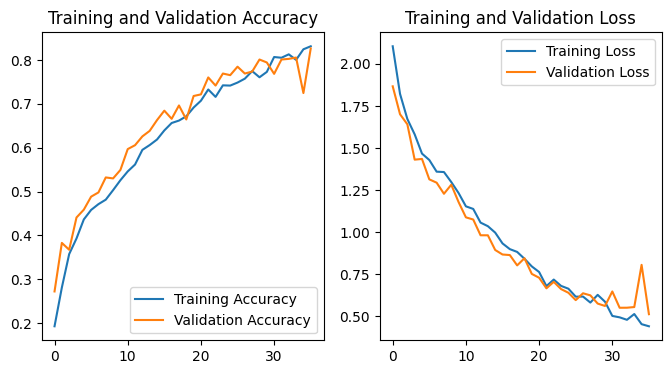

In [31]:
# Model Evaluation based on accuracy and loss metric
acc = history3.history['accuracy']
val_acc = history3.history['val_accuracy']

loss = history3.history['loss']
val_loss = history3.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 4))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

## Observations
- Model has good validation accuracy and low validation loss
- Difference between Validation Loss and Training Loss is low. Also, Validation Accuracy and Traning accuracy are very close.  
- Model can predict now on unseen dataset with good accuracy


## Model Predictions

> Predictions from the created model on Test dataset

Found 118 files belonging to 9 classes.
{'actinic keratosis': 0, 'basal cell carcinoma': 0, 'dermatofibroma': 0, 'melanoma': 0, 'nevus': 0, 'pigmented benign keratosis': 0, 'seborrheic keratosis': 0, 'squamous cell carcinoma': 0, 'vascular lesion': 0}
1/1 [==============================] - 0s 33ms/step


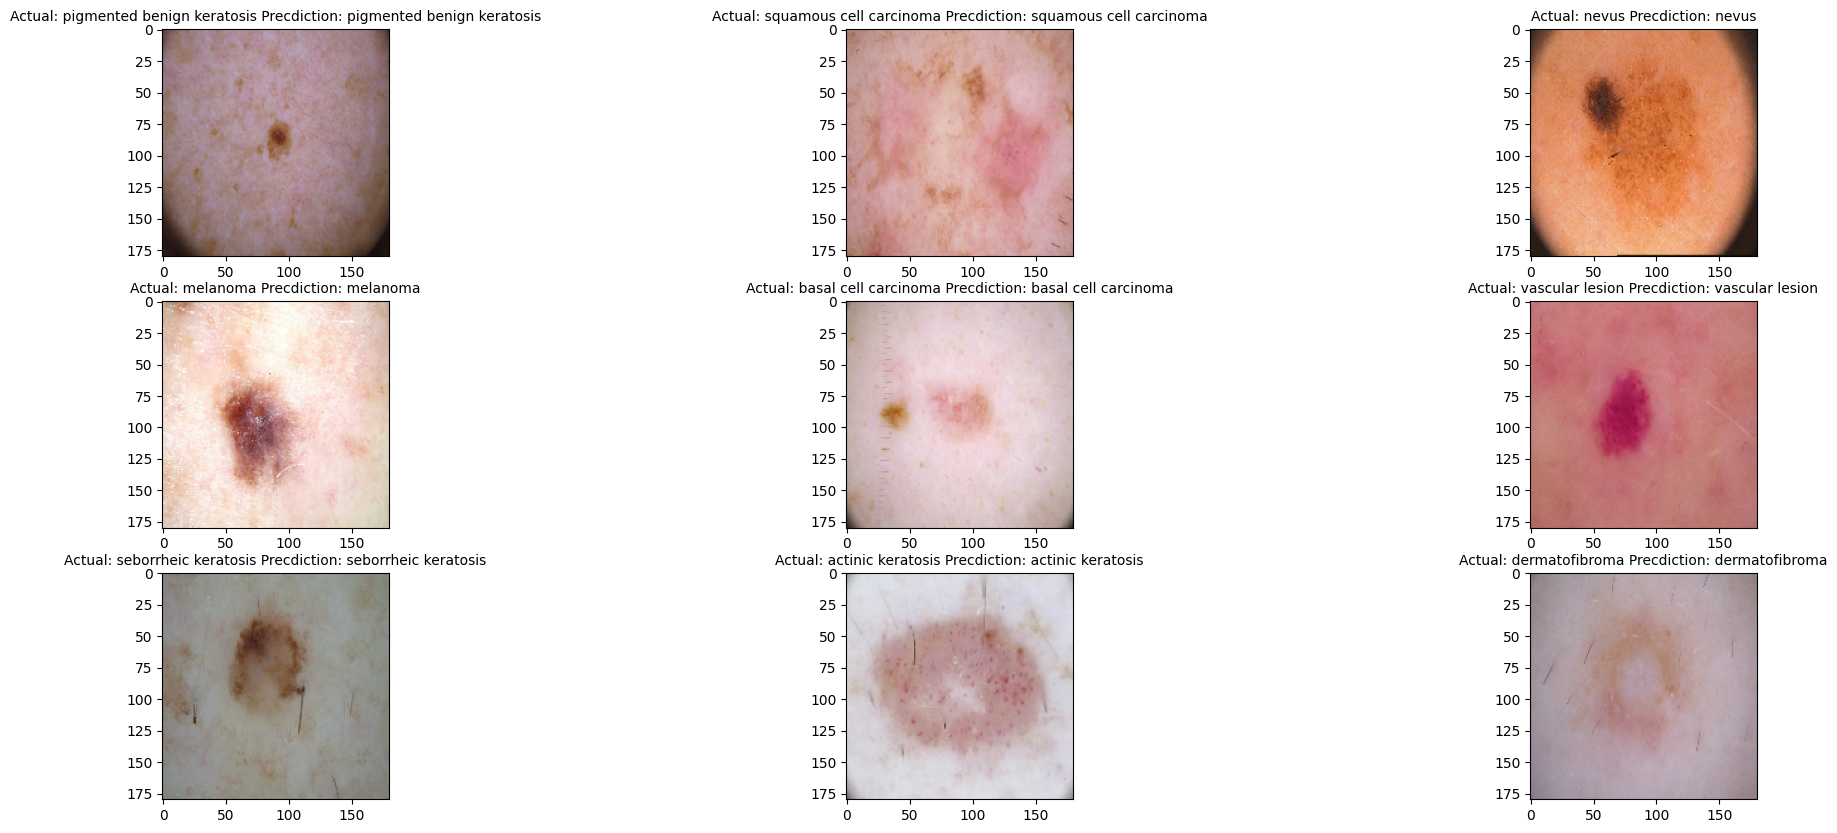

In [32]:
from glob import glob
from tensorflow.keras.preprocessing.image import load_img
import matplotlib.pyplot as plt

# Loading the Test Dataset for model predictions
mel_test_dataset=tf.keras.utils.image_dataset_from_directory(data_dir_test,labels='inferred',
    label_mode='categorical',
    color_mode='rgb',
    batch_size=32,
    image_size=(img_height,img_width),
    seed=123)

label_test=mel_test_dataset.class_names


# Class Wise prediction for Test dataset
index=1
label_test_dict = {key: 0 for key in label_test}
plt.figure(figsize=(25,10))
print(label_test_dict)
for images,labels in mel_dataset:
    label1=labels[0]
    class_index=tf.argmax(label1)
    if(label_test_dict[label_test[class_index]]==0):
        image=images[0]
        # Predicting for image from each class
        img = np.expand_dims(image,axis=0)
        pred = Model3.predict(img)
        pred = np.argmax(pred)
        pred_class = label_test[pred]
        plt.subplot(3,3,index)
        plt.imshow(image.numpy().astype("uint8"))
        # Displaying Predicted class of Image in Title along with the actual class of image
        plt.title("Actual: "+label_test[class_index]+" Precdiction: "+pred_class,fontsize=10)
        index=index+1
        label_test_dict[label_test[class_index]]+=1

plt.show()

## Observations:
- Model is able to predict for test dataset, for all 9 classes the predictions are correct.
- In Above figure,  Title we can see both actual and predicted class names.
- Class imbalance is not there in dataset now
- Model is not overfitting, as evident from loss/accuracy metrics.
- <b>Model Accuracy:</b>
    - Validation Accuracy: 82.63%
    - Traning Accuracy: 83.12%
- <b>Model Loss</b>
    - Validation Loss: 0.5129
    - Training Loss: 0.4411